# S07 T01: Tasca del test d'hipòtesis
Descripció
Aprèn a realitzar test d'hipòtesis amb Python.

## NIVELL 1
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 



Per a realitzar aquest sprint utilitzo el mateix conjunt de dades que els sprints 5 i 6, relacionat amb les jugadores del mundial de futbol femení 2019.

In [1]:
# Crido a les llibreries que necessito
# Faig entrar l'arxiu CSV gràcies a pandas

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

women = pd.read_csv("C:\\Users\\Anna\DataScience\\SPRINTS\\SPRINT 5\\Womens Squads.csv", encoding = "ISO-8859-1", engine='python', sep=";")

display(women)

,Squad no.,Country,Pos.,Player,DOB,Age,Caps,Goals,Club
0,1,US,GK,Alyssa Naeher,20-abr-88,31,43.0,0.0,Chicago Red Stars
1,2,US,FW,Mallory Pugh,29-abr-98,21,50.0,15.0,Washington Spirit
2,3,US,MF,Sam Mewis,09-oct-92,26,47.0,9.0,North Carolina Courage
3,4,US,DF,Becky Sauerbrunn,06-jun-85,34,155.0,0.0,Utah Royals
4,5,US,DF,Kelley O'Hara,04-ago-88,30,115.0,2.0,Utah Royals
...,...,...,...,...,...,...,...,...,...
547,19,France,DF,Griedge Mbock Bathy,26-feb-95,24,49.0,4.0,Lyon
548,20,France,FW,Delphine Cascarino,05-feb-97,22,11.0,1.0,Lyon
549,21,France,GK,Pauline Peyraud-Magnin,17-mar-92,27,1.0,0.0,Arsenal
550,22,France,DF,Julie Debever,18-abr-88,31,2.0,0.0,Guingamp


Abans de començar a fer l'exercici, faig una mica d'estudi de les dades

In [2]:
women.count()

Squad no.    552
Country      552
Pos.         552
Player       552
DOB          552
Age          552
Caps         520
Goals        520
Club         552
dtype: int64

In [3]:
# Com que en l'anterior punt veiem que les columnes "Caps" i "Goals" tenen menys quantitat de dades que la resta de columnes, em fa sospitar que hi ha nuls en aquest dataset, per tant ho comprovo

print(women.isnull())

print("____________________________________________________________________________")

print(women.count())

print("____________________________________________________________________________")

print(women.isnull().sum())

     Squad no.  Country   Pos.  Player    DOB    Age   Caps  Goals   Club
0        False    False  False   False  False  False  False  False  False
1        False    False  False   False  False  False  False  False  False
2        False    False  False   False  False  False  False  False  False
3        False    False  False   False  False  False  False  False  False
4        False    False  False   False  False  False  False  False  False
..         ...      ...    ...     ...    ...    ...    ...    ...    ...
547      False    False  False   False  False  False  False  False  False
548      False    False  False   False  False  False  False  False  False
549      False    False  False   False  False  False  False  False  False
550      False    False  False   False  False  False  False  False  False
551      False    False  False   False  False  False  False  False  False

[552 rows x 9 columns]
____________________________________________________________________________
Squad no.  

In [4]:
# Eliminem les files que contenen algun valor nul i comprobem que s'han eliminat, de manera que totes les files tenen la mateixa mida ara.

women = women.dropna(subset=["Caps", "Goals"])

women.count()

Squad no.    520
Country      520
Pos.         520
Player       520
DOB          520
Age          520
Caps         520
Goals        520
Club         520
dtype: int64

In [5]:
women.describe()

,Squad no.,Age,Caps,Goals
count,520.000000,520.000000,520.000000,520.000000
mean,11.867308,26.178846,43.661538,7.348077
std,6.609365,3.996715,43.674846,15.541727
min,1.000000,16.000000,0.000000,0.000000
25%,6.000000,23.000000,11.750000,0.000000
50%,12.000000,26.000000,29.500000,1.500000
75%,18.000000,29.000000,62.000000,8.250000
max,23.000000,41.000000,282.000000,181.000000


Decideixo treballar amb l'atribut "Age" i procedeixo a calcular el P-value i mirar si es rebutja la hipòtesi nul·la amb una alfa del 5%

In [6]:
# Em quedo només amb la columna d'edats

edats = women.Age

display(edats)

0      31
1      21
2      26
3      34
4      30
       ..
547    24
548    22
549    27
550    31
551    26
Name: Age, Length: 520, dtype: int64

In [7]:
edats.describe()

count    520.000000
mean      26.178846
std        3.996715
min       16.000000
25%       23.000000
50%       26.000000
75%       29.000000
max       41.000000
Name: Age, dtype: float64

In [8]:
# Agafo una mostra al·leatòria de 50 edats de la base de dades que tinc

mostra = edats.sample(n=50)
print(mostra)

245    28
250    26
93     29
79     28
298    21
510    36
249    31
490    23
143    20
368    25
83     28
501    23
27     27
306    28
329    41
486    28
124    27
280    21
413    18
418    29
196    29
515    31
171    26
376    23
99     29
235    25
241    27
385    21
200    32
455    24
42     31
371    27
493    26
400    20
236    25
424    28
395    32
138    32
170    25
92     27
149    35
135    22
108    27
332    34
150    30
375    29
425    26
260    27
406    26
275    20
Name: Age, dtype: int64


In [9]:
# En faig la descprició per veure les caracterísitques bàsiques

mostra.describe()

count    50.00000
mean     27.06000
std       4.48767
min      18.00000
25%      25.00000
50%      27.00000
75%      29.00000
max      41.00000
Name: Age, dtype: float64

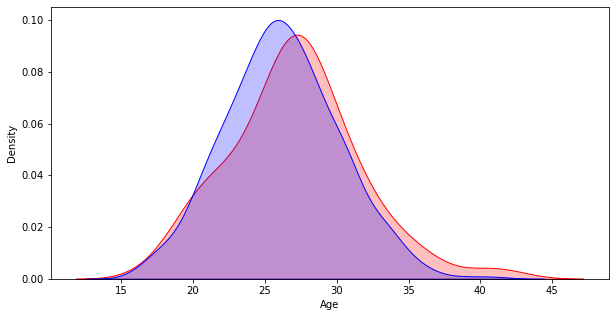

In [11]:
#Faig un gràfic amb la totalitat de les edats del dataset i amb la mostra per veure una mica com s'assemblen

plt.figure(figsize=(10,5))
fig = sns.kdeplot(mostra, shade=True, color="r")
fig = sns.kdeplot(women['Age'], shade=True, color="b")
plt.show()

Estableixo hipòtesi nul·la i hipòtesi alternativa

En aquest cas, la hipòtesi nul·la és el fet acceptat, és a dir, que la mitjana d'edat de les jugadores de futbol femení que juguen a la selecció és de 26,179:

Ho: μ = 26,179

I com a hipòtesi alternativa, direm que la mitjana d'edat de les jugadores és diferent a 26,179:

H1: μ ≠ 26,179

In [19]:
# Importo les llibreries necessàries per a realitzar els càlculs que vull fer
import scipy
from scipy import stats

# Calculo la T i el P-Value de la mostra de les edats
scipy.stats.ttest_ind(mostra, women["Age"])


Ttest_indResult(statistic=1.4725396333874783, pvalue=0.1414290929905033)

El P-value per a una prova de dues cues és sempre dues vegades el P-value per a qualsevol de les proves d'una cua, per tant, hem el P-value d'aquesta prova l'hem de multiplicar per dos (0,2828).

Com que la mostra que hem agafat és de tamany 50, el nostre grau de llibertat és de n-1, per tant és de 49, i amb una alfa de 5%, quan mirem a la T.-table student, el valor que ens dona és 1.6766 (i de -1.6766 per la cua esquerre).

El valor de T* és 1.4725, per tant es troba entre -1.6766 i 1.6766, o dit d'una altra manera, no és menor a -1.6766 ni major a 1.6766, per tant, no es rebutja la hipòtesi nul·la i descartem la hipòtesi alternativa.



## NIVELL 2
### Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.






## NIVELL 3
### Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

